## Supervised Learning

Focus on dealing with categorical data, density plots, model performance metrics in automation.

* When a machine learning algorithm has the inability to capture the true relationship this is called bias of the algorithm

* The difference in fit between training model of the test model is called  variance.

* If the training model's RMSE is much lower than the test model You may wish to look into if the training model is over fit.


## Analyzing models

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading file into a dataframe
# I am using a mac 
# the directories use '/' on the mac and you may need to use '\\' or '\' on windows
df = pd.read_csv('./Data/Used_Cars.csv')   # ./ current directory
df.head(6)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,2 days left


In [29]:
# getting the names of the features
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'condition'],
      dtype='object')

In [30]:
# let us drop some features
df.drop(['title_status', 'lot', 'vin', 'condition'], axis=1, inplace=True)
df.head(5)

,price,brand,model,year,mileage,color,state
0,6300,toyota,cruiser,2008,274117,black,new jersey
1,2899,ford,se,2011,190552,silver,tennessee
2,5350,dodge,mpv,2018,39590,silver,georgia
3,25000,ford,door,2014,64146,blue,virginia
4,27700,chevrolet,1500,2018,6654,red,florida


In [31]:

# filtering out data from original data frame 
# we are only interested in black white red cars to do our analysis

df2 = df.loc[(df.color == 'black') | 
             (df.color == 'white')| 
             (df.color == 'red')]




df2 = pd.get_dummies(df2, columns=['color'], drop_first = False)
df2.head(5)

,price,brand,model,year,mileage,state,color_black,color_red,color_white
0,6300,toyota,cruiser,2008,274117,new jersey,1,0,0
4,27700,chevrolet,1500,2018,6654,florida,0,1,0
5,5700,dodge,mpv,2018,45561,texas,0,0,1
6,7300,chevrolet,pk,2010,149050,georgia,1,0,0
9,5250,ford,mpv,2017,63418,texas,1,0,0


Visualize Data

You can change the Matplotlib backend by passing an argument to the %matplotlib magic command.

The inline backend is popular for Jupyter Notebooks because it displays the plot in the notebook itself, immediately below the cell that creates the plot:

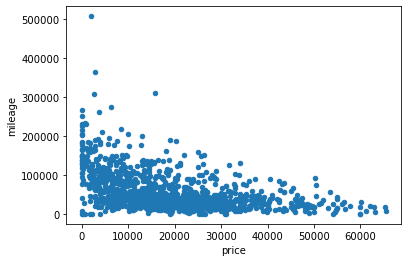

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df2.plot(x ='price', y='mileage', kind = 'scatter')
plt.show()

Looks like we have some outliers what should we do? We could remove them or we could estimate our models using them. This is your call, but you need to understand what you're doing at this point and why.

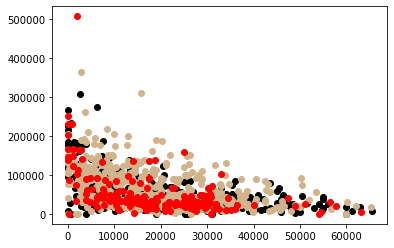

In [33]:
from matplotlib import pyplot as plt

df_black_cars = df2[df2['color_black'] == 1]
df_white_cars = df2[df2['color_white'] == 1]
df_red_cars = df2[df2['color_red'] == 1]



plt.scatter(df_black_cars['price'],df_black_cars['mileage'],color= 'black')
plt.scatter(df_white_cars['price'],df_white_cars['mileage'],color= 'tan')
plt.scatter(df_red_cars['price'],df_red_cars['mileage'],color= 'red')
plt.show()

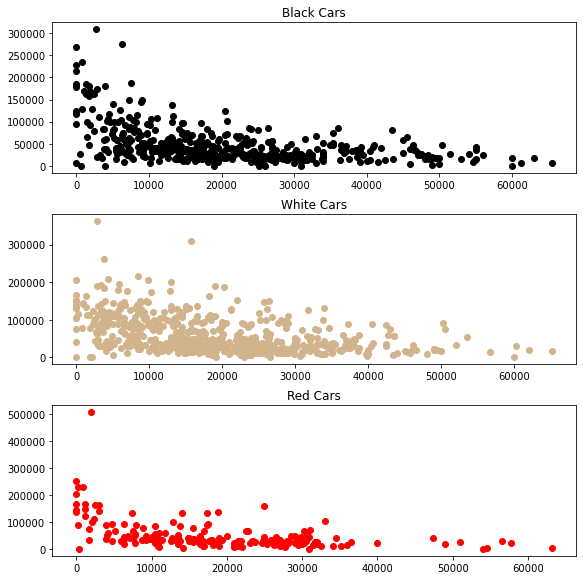

In [34]:
import matplotlib.pyplot as plt

#define subplots
fig, ax = plt.subplots(3, 1, figsize=(8,8))
fig.tight_layout(h_pad=2)



ax[0].scatter(df_black_cars['price'],df_black_cars['mileage'],color= 'black')

ax[1].scatter(df_white_cars['price'],df_white_cars['mileage'],color= 'tan')
ax[2].scatter(df_red_cars['price'],df_red_cars['mileage'],color= 'red')

ax[0].set_title("Black Cars")
ax[1].set_title("White Cars")
ax[2].set_title("Red Cars")


df_black_cars = df2[df2['color_black'] == 1]
df_white_cars = df2[df2['color_white'] == 1]
df_red_cars = df2[df2['color_red'] == 1]


 
plt.show()



#### Removing Outliners

In [35]:
# I am may have already included the import you see below
# The imports are included the import so you can see them

import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#### Doing analysis on Aggregated Data

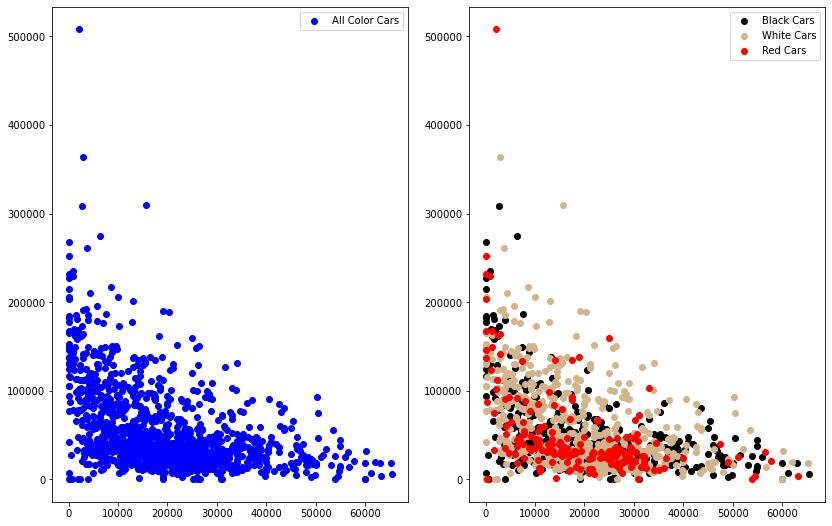

In [36]:
# I am may have already included the import you see below
# The imports are included the import so you can see them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# reading in the data form file
df = pd.read_csv('./Data/Used_Cars.csv')   # ./ current directory


# let us drop some features
df.drop(['title_status', 'lot', 'vin', 'condition'], axis=1, inplace=True)


# create new data frame with only specific colors
df2 = df.loc[(df.color == 'black') | 
             (df.color == 'white')| 
             (df.color == 'red')]

# creating dummy variables that corresponds to the color feature
df2 = pd.get_dummies(df2, columns=['color'], drop_first = False)

#----------------------------------------
#----------------------------------------

# creating a figure that has one row two columns
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.tight_layout(pad = 3)


# creating data frames so the only hold a specific color of a car
df_black_cars = df2[df2['color_black'] == 1]
df_white_cars = df2[df2['color_white'] == 1]
df_red_cars = df2[df2['color_red'] == 1]

#----------------------------------------

# subplot -> total_rows, total_columns, subplot_index
plt.subplot(1,2, 1)

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

plt.scatter(df2['price'],df2['mileage'],color= 'blue', label = "All Color Cars")
plt.legend()

#----------------------------------------

# plot in subplot in second column
plt.subplot(1,2, 2)
plt.scatter(df_black_cars['price'],df_black_cars['mileage'],color= 'black' , label ='Black Cars')

plt.subplot(1,2, 2)
plt.scatter(df_white_cars['price'],df_white_cars['mileage'],color= 'tan',  label ='White Cars')

plt.subplot(1,2, 2)
plt.scatter(df_red_cars['price'],df_red_cars['mileage'],color= 'red',  label ='Red Cars')

plt.legend()

#----------------------------------------

plt.show()

#### Aggregated Data Modeling without outliers removed

--------------------------------------
Model Info
--------------------------------------
price = 25464.973961909156 + -0.11117402031235055 mileage  + error 

Test r_score is:	 0.227410640048348
Test rmse is:		 111319899.76624611

Training-Test Split:	 0.7 training 0.3 test

Training r_score is:	 0.1896867644042014
Training rmse is:	 123073105.76518662
Model Variance:		 2.106958157504494

Mean of Test Error:	 -406.9492989464382
Mean of Train Error:	 -1.4790772422771864e-12

Average Car with 0 mileage should cost:  25464.97


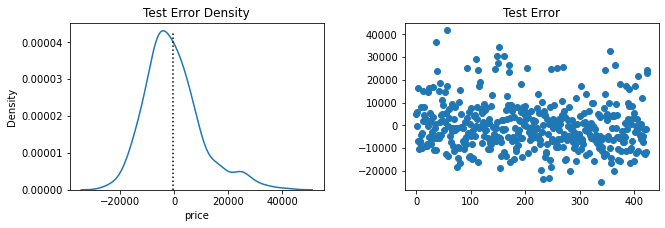

In [37]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df2[['mileage']]
y_data = df2['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test


r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train


#normalizing by size
model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"price = {model.intercept_} + {model.coef_[0]} mileage  + error ", end="\n\n")


print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.7 training 0.3 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()


print('Average Car with 0 mileage should cost: ', round(model.intercept_, 2))

#-------------------------------------------------------------

# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)




#density plot of error of the test model

plt.subplot(1,2, 1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

my_kde = sns.kdeplot(error_test)

x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')

plt.subplot(1,2, 2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)

plt.show()

#### Plotting regression line on Test Data

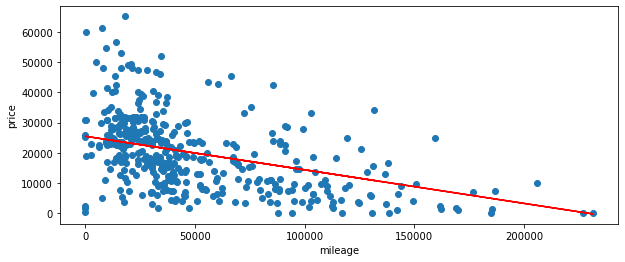

In [38]:
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(x_test, y_test)


ax.set_xlabel('mileage')
ax.set_ylabel('price')


plt.plot(x_test.to_numpy(),predictions_test,'-r')


plt.show()



### Aggregated Data Modeling with outliers removed

In [39]:
# I am may have already included the import you see below
# The imports are included the import so you can see them

import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#### Removing Outliners

Working on column: price
Working on column: mileage


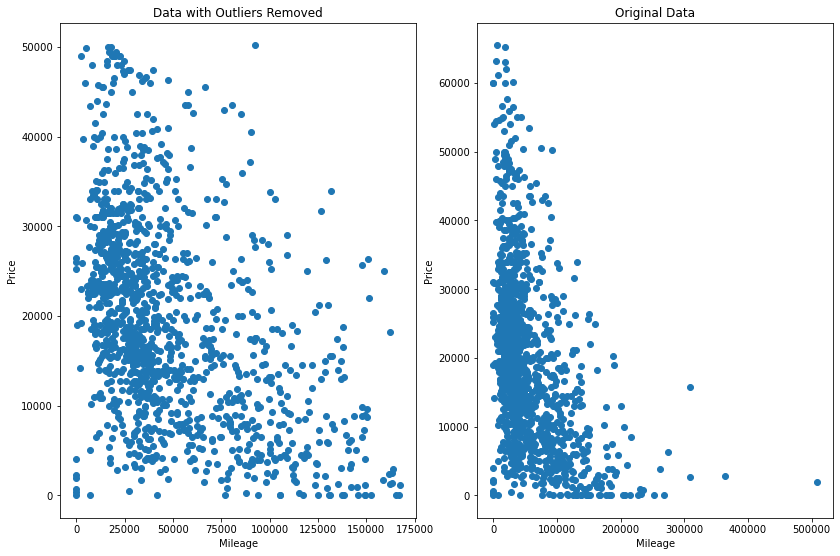

In [40]:
#deep copy of dataframe
df3 = df2.copy(deep=True)  # deep : bool, default True

columns =['price', 'mileage']

# remove outlines 
df3 = remove_outliers(df3,columns, 2.5)


fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.tight_layout(pad = 3)



ax[0].set_xlabel('Mileage')
ax[0].set_ylabel('Price')
ax[0].set_title('Data with Outliers Removed')

ax[0].scatter( df3['mileage'], df3['price'])

ax[1].set_xlabel('Mileage')
ax[1].set_ylabel('Price')
ax[1].set_title('Original Data')

ax[1].scatter( df2['mileage'], df2['price'])


plt.show()

--------------------------------------
Model Info
--------------------------------------
price = 25780.896160262157 + -0.13748340890909977 mileage  + error 

Test r_score is:	 0.18598222150389254
Test rmse is:		 91620057.9901673

Training-Test Split:	 0.7 training 0.3 test

Training r_score is:	 0.19421425804237624
Training rmse is:	 98810454.40332721
Model Variance:		 2.156669246194573

Mean of Test Error:	 -153.97921592885535
Mean of Train Error:	 -9.519764075882242e-13

Average Car with 0 mileage should cost:  25780.9


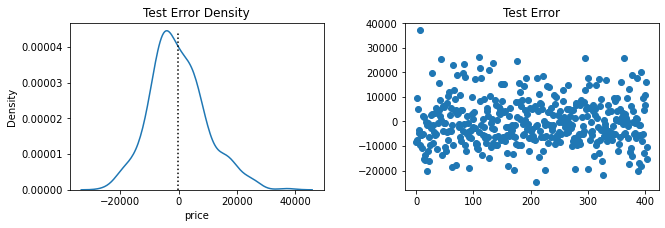

In [55]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df3[['mileage']]
y_data = df3['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test


r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train


#normalizing by size
model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"price = {model.intercept_} + {model.coef_[0]} mileage  + error ", end="\n\n")


print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.7 training 0.3 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()


print('Average Car with 0 mileage should cost: ', round(model.intercept_, 2))

#-------------------------------------------------------------

# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)




#density plot of error of the test model

plt.subplot(1,2, 1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

my_kde = sns.kdeplot(error_test)

x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')

plt.subplot(1,2, 2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)

plt.show()

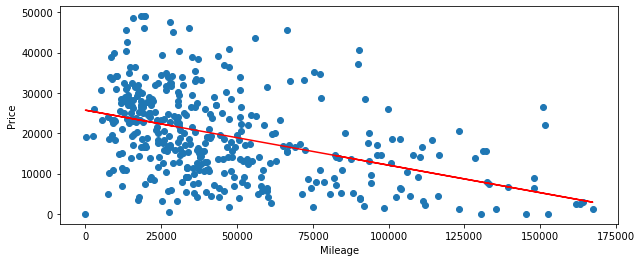

In [42]:
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(x_test, y_test)


ax.set_xlabel('Mileage')
ax.set_ylabel('Price')

plt.plot(x_test.to_numpy(),predictions_test,'-r')


plt.show()


### Dealing with more specific data

In [43]:
# I am may have already included the import you see below
# The imports are included the import so you can see them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# reading in the data form file
df = pd.read_csv('./Data/Used_Cars.csv')   # ./ current directory


# let us drop some features
df.drop(['title_status', 'lot', 'vin', 'condition'], axis=1, inplace=True)


# create new data frame with only specific colors
df2 = df.loc[(df.color == 'black') | 
             (df.color == 'white')| 
             (df.color == 'red')]

# creating dummy variables that corresponds to the color feature
df2 = pd.get_dummies(df2, columns=['color'], drop_first = False)


# creating data frames so the only hold a specific color of a car
df_black_cars = df2[df2['color_black'] == 1]
df_white_cars = df2[df2['color_white'] == 1]
df_red_cars = df2[df2['color_red'] == 1]

#removing outlines
columns =['price', 'mileage']

# remove outlines 
df_black_cars = remove_outliers(df_black_cars,columns, 2.5)
df_white_cars = remove_outliers(df_white_cars,columns, 2.5)
df_red_cars = remove_outliers(df_red_cars,columns, 2.5)


df_black_cars.head(3)

Working on column: price
Working on column: mileage
Working on column: price
Working on column: mileage
Working on column: price
Working on column: mileage


,price,brand,model,year,mileage,state,color_black,color_red,color_white
6,7300,chevrolet,pk,2010,149050,georgia,1,0,0
9,5250,ford,mpv,2017,63418,texas,1,0,0
12,31900,chevrolet,1500,2018,22909,tennessee,1,0,0


In [44]:
df_red_cars.head(3)

,price,brand,model,year,mileage,state,color_black,color_red,color_white
4,27700,chevrolet,1500,2018,6654,florida,0,1,0
17,16500,buick,encore,2018,20002,tennessee,0,1,0
32,29800,chevrolet,camaro,1973,46226,pennsylvania,0,1,0


In [45]:
df_white_cars.head(3)

,price,brand,model,year,mileage,state,color_black,color_red,color_white
5,5700,dodge,mpv,2018,45561,texas,0,0,1
11,12920,gmc,mpv,2017,39650,california,0,0,1
15,12710,gmc,door,2017,25747,california,0,0,1


### Black, Red and White Car Analysis

#### Black Cars

--------------------------------------
Model Info
--------------------------------------
price = 27659.559829506416 + -0.18988460183813324 mileage  + error 

Test r_score is:	 0.040045257691256775
Test rmse is:		 130622011.08268829

Training-Test Split:	 0.7 training 0.3 test

Training r_score is:	 0.21183882809391508
Training rmse is:	 111256436.22338966
Model Variance:		 2.726076656538948

Mean of Test Error:	 938.533822870403
Mean of Train Error:	 2.3394671974808064e-12

Average Black Car with 0 mileage should cost:  27659.56


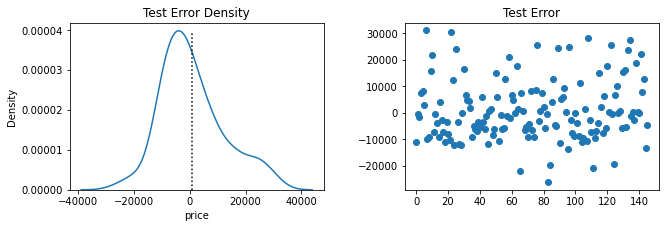

In [46]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df_black_cars[['mileage']]
y_data = df_black_cars['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test


r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train


#normalizing by size
model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"price = {model.intercept_} + {model.coef_[0]} mileage  + error ", end="\n\n")


print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.7 training 0.3 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()


print('Average Black Car with 0 mileage should cost: ', round(model.intercept_, 2))

#-------------------------------------------------------------

# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)




#density plot of error of the test model

plt.subplot(1,2, 1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

my_kde = sns.kdeplot(error_test)

x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')

plt.subplot(1,2, 2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)

plt.show()

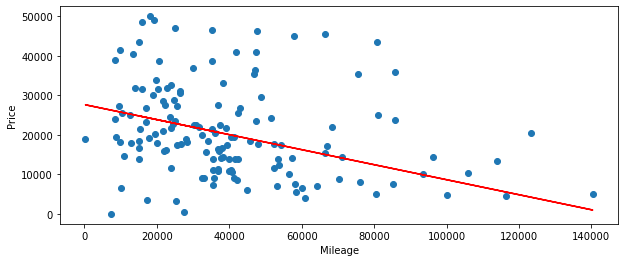

In [47]:
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(x_test, y_test)


ax.set_xlabel('Mileage')
ax.set_ylabel('Price')

plt.plot(x_test.to_numpy(),predictions_test,'-r')


plt.show()

#### Red Cars

--------------------------------------
Model Info
--------------------------------------
price = 23403.540712628797 + -0.12310747575644271 mileage  + error 

Test r_score is:	 0.19214610226918427
Test rmse is:		 89587662.24624328

Training-Test Split:	 0.7 training 0.3 test

Training r_score is:	 0.22513873658900596
Training rmse is:	 76970877.92714842
Model Variance:		 2.6664265161099667

Mean of Test Error:	 801.6339604393302
Mean of Train Error:	 7.795668872339384e-13

Average Black Car with 0 mileage should cost:  23403.54


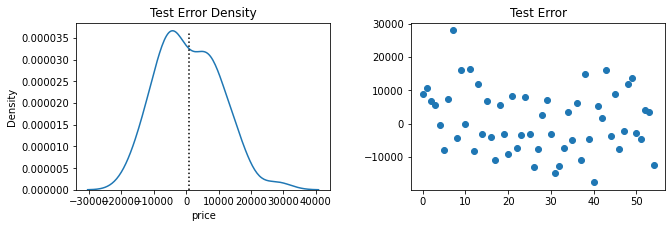

In [48]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df_red_cars[['mileage']]
y_data = df_red_cars['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test


r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train


#normalizing by size
model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"price = {model.intercept_} + {model.coef_[0]} mileage  + error ", end="\n\n")


print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.7 training 0.3 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()


print('Average Black Car with 0 mileage should cost: ', round(model.intercept_, 2))

#-------------------------------------------------------------

# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)




#density plot of error of the test model

plt.subplot(1,2, 1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

my_kde = sns.kdeplot(error_test)

x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')

plt.subplot(1,2, 2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)

plt.show()

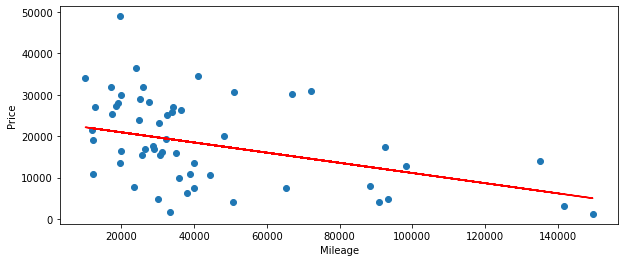

In [49]:
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(x_test, y_test)


ax.set_xlabel('Mileage')
ax.set_ylabel('Price')

plt.plot(x_test.to_numpy(),predictions_test,'-r')


plt.show()

#### White Cars

--------------------------------------
Model Info
--------------------------------------
price = 24897.750772537373 + -0.11776394361559112 mileage  + error 

Test r_score is:	 0.227256418071494
Test rmse is:		 84346400.48496391

Training-Test Split:	 0.7 training 0.3 test

Training r_score is:	 0.2039341582694285
Training rmse is:	 80570504.46279229
Model Variance:		 2.428931907654648

Mean of Test Error:	 177.90381431587906
Mean of Train Error:	 3.0509588721894406e-13

Average Black Car with 0 mileage should cost:  24897.75


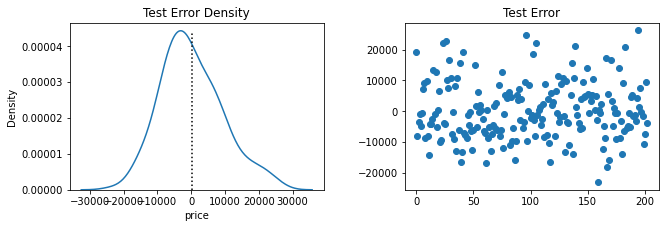

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df_white_cars[['mileage']]
y_data = df_white_cars['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test


r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train


#normalizing by size
model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"price = {model.intercept_} + {model.coef_[0]} mileage  + error ", end="\n\n")


print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.7 training 0.3 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()


print('Average Black Car with 0 mileage should cost: ', round(model.intercept_, 2))

#-------------------------------------------------------------

# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)




#density plot of error of the test model

plt.subplot(1,2, 1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')

my_kde = sns.kdeplot(error_test)

x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')

plt.subplot(1,2, 2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)

plt.show()

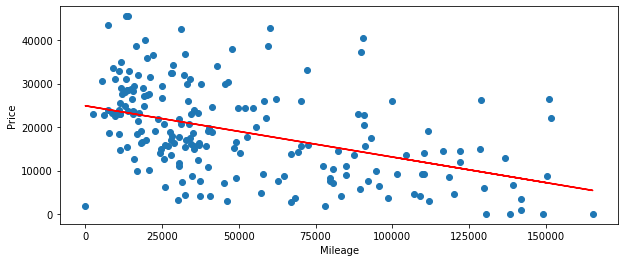

In [51]:
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(x_test, y_test)


ax.set_xlabel('Mileage')
ax.set_ylabel('Price')

plt.plot(x_test.to_numpy(),predictions_test,'-r')


plt.show()

## Automation

Working on column: price
Working on column: mileage


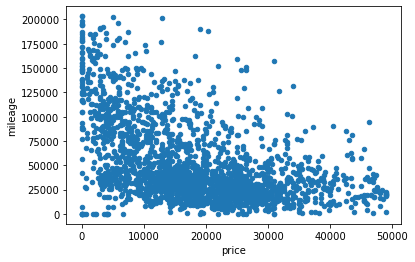

In [52]:
# I am may have already included the import you see below
# The imports are included the import so you can see them

import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df


#-----------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading file into a dataframe
# I am using a mac 
# the directories use '/' on the mac and you may need to use '\\' or '\' on windows
df = pd.read_csv('./Data/Used_Cars.csv')   # ./ current directory


# let us drop some features
df.drop(['title_status', 'lot', 'vin', 'condition'], axis=1, inplace=True)


columns =['price', 'mileage']

# remove outlines 
df = remove_outliers(df,columns, 2.5)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x ='price', y='mileage', kind = 'scatter')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



def training_automation(data_source):
    
    
    
    report_df = pd.DataFrame(columns=['Train', 
                                      'Test', 
                                      'Test_R_Score', 
                                      'Test_RMSE',
                                      'Train_R_Score', 
                                      'Train_RMSE',
                                      'Model_Var',
                                      'Model_Error',
                                      'Avg_New_Price'  ])
    # df
    
    model = LinearRegression()

    # getting the dependent and independent variables
    x_data = data_source[['mileage']]
    y_data = data_source['price']
    
    sizes = np.arange(0.1, 1.0, 0.1)

    for  size in sizes:
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = size)


        # fit the model -> build the training model
        model.fit(x_train, y_train)


        predictions_test = model.predict(x_test) 


        # getting the error of the model
        error_test = y_test - predictions_test


        r2_test = r2_score(y_test, predictions_test)
        rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


        # getting the trainset info
        predictions_train = model.predict(x_train)
        r2_train = r2_score(y_train, predictions_train)
        rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

        # getting the error of the model
        error_train = y_train - predictions_train


        #normalizing by size
        model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)
        
        error_mean = error_test.mean()
        avg_new_car_price = round(model.intercept_, 2)
        
        # appending new to report dataframe
        report_df.loc[len(report_df.index)] = {'Train': size, 
                                              'Test': 1- size, 
                                              'Test_R_Score': r2_test, 
                                              'Test_RMSE': rmse_test,
                                              'Train_R_Score': r2_train, 
                                              'Train_RMSE': rmse_train,
                                              'Model_Var': model_variance,
                                              'Model_Error': error_mean,
                                              'Avg_New_Price':avg_new_car_price}
        

    return report_df
        


In [54]:
report = training_automation(df)

report

,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_New_Price
0,0.1,0.9,0.213805,8.827406e+07,0.252895,8.937469e+07,0.109743,-407.308559,25784.35
1,0.2,0.8,0.222766,8.681619e+07,0.217569,9.226100e+07,0.235246,-624.809102,25216.55
2,0.3,0.7,0.230850,8.712586e+07,0.206897,8.891994e+07,0.419924,-370.587254,24662.74
3,0.4,0.6,0.227099,8.727448e+07,0.219072,8.831578e+07,0.658806,-506.447827,24665.32
4,0.5,0.5,0.232449,8.922761e+07,0.216841,8.596821e+07,1.037914,53.769526,24418.00
5,0.6,0.4,0.220087,9.272823e+07,0.225099,8.431703e+07,1.649635,652.096064,23995.38
6,0.7,0.3,0.251896,9.000319e+07,0.212328,8.658633e+07,2.425411,366.207733,24243.18
7,0.8,0.2,0.253803,9.335211e+07,0.215262,8.621712e+07,4.331025,697.367171,24070.06
8,0.9,0.1,0.206868,8.629806e+07,0.226999,8.774233e+07,8.851857,-348.112511,24457.21
